## Exercise: Gravity Wells

In astronomy, the effect of gravity on an region is sometimes visualised as a sheet which is deformed by a presence of massive bodies such as stars. Planets can be visualised as moving around the curved space surrounding the star, such as in the image below.

<center><img src='../../Resources/gravity_spacetime.png' width = 500/>
<figcaption>Space-time being bent by a star, and an orbiting planet</figcaption></center>
</figure>

In this exercise, use the tools introduced in this notebook to produce a plot which includes:

* a representation of the deformed space-time using ```contour3D```
* the orbital path of a planet using ```plot3D```
* the locations of the star and planet using ```scatter3D```.

In the cell below, code to generate much of the necessary data has already been created. Complete the cell so the various components of the plot are added. Once you have a basic representation, use your own judgment to chose options make the image look as clear, informative and attractive.

The variables which contain the data generated in the provided code are as follows:

| Variable | Content |
|-|-|
| ```x_well``` | A list containing the x-coordinates of the grid for the gravitational well |
| ```y_well``` | A list containing the y-coordinates of the grid for the gravitational well |
| ```values_well``` | A list of lists containing the depth of the gravitational well at the grid point intersections |
| ```x_orbit``` | A list of the x-coordinates of positions on the planets orbit |
| ```y_orbit``` | A list of the y-coordinates of positions on the planets orbit |
| ```z_orbit``` | A list of the z-coordinates of positions on the planets orbit |

In addition, the star is found at $x=0$, $y=0$ and the planet orbits the star at a distance of 5 (e.g. it might be found at $x=5$, $y=0$). It is recommended that the star, planet and planet's orbit are represented on the plane $z=0.5$ so they are visibly above the gravity well.

/var/folders/2k/mxjw2m4n6yqgy1f86x1cmhgr0000gp/T/ipykernel_92605/2978801190.py:7: RuntimeWarning: divide by zero encountered in divide
  values_well = -1 / (x_well**2 + y_well**2)


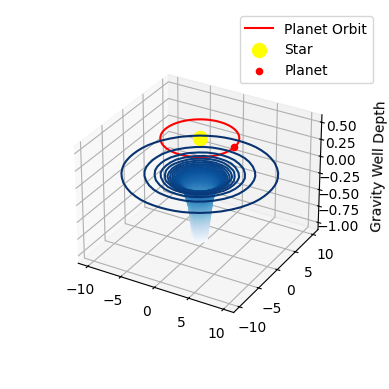

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Create the coordinates for the gravity well
x_well, y_well = np.meshgrid(np.arange(-10, 11), np.arange(-10, 11))

values_well = -1 / (x_well**2 + y_well**2)
values_well[(x_well == 0) & (y_well == 0)] = -1 # where x_well and y_well are both 0 (avoid zero division)

# Create the coordinates for the planet's orbit
theta = np.linspace(0, 2*np.pi, 101)
x_orbit = 5 * np.cos(theta)
y_orbit = 5 * np.sin(theta)
z_orbit = np.full_like(x_orbit, 0.5)

# Create the figure and axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the contour plot for the gravitational well
# Use x_well, y_well and values_well for the data
# Using 100 contours helps populate the higher, less dense regions of the plot
# Blue is a nice colour (but feel free to use your own preference!)
ax.contour3D(x_well, y_well, values_well, 100, cmap="Blues")
# Create the line plot for the planet's orbit
# Use x_orbit, y_orbit and z_orbit for the data
# Give it a different colour to the gravity well to make it stand out
# Give it a label
ax.plot3D(x_orbit, y_orbit, z_orbit, color = "red", label="Planet Orbit")
# Use a scatter point with single values for x, y and z for the star
# Using a different scatter for the star and planet gives us more control over each
# Colour it yellow because (some) stars are yellow
# Set the size to a large value (100) so it looks big
# Give it a label
ax.scatter3D(0, 0, 0.5, color="Yellow", s=100, label="Star")
# Use a scatter point with single values for x, y and z for the planet
# Give it the same colour as the orbit to show they're related
# Set the size to a smaller value (20) than the star so it looks smaller
# Give it a label
ax.scatter3D(5, 0, 0.5, color="Red", s=20, label="Planet")

# Add a legend
plt.legend()

# add some padding to the label so it won't overlap with the plot
ax.set_zlabel("Gravity Well Depth", labelpad=14)

# move the camera back to see the z-axis label
ax.set_box_aspect(None, zoom=0.75)